In [108]:
import pandas as pd
import glob
import os
import seaborn as sns

path = r'C:\Users\tsavic\Dropbox\FRANCUSKA\CIFRE\my papers\RRDV\time_sync_measurements\20220825-0001' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

In [121]:
jitter_list = []

for filename in all_files:
    df              = pd.read_csv(filename, index_col=None, header=0) # read CSV
    df              = df.drop(df[df['Time'] == '(ns)'].index)         # remove the first row
    
    df['Channel A'] = pd.to_numeric(df['Channel A'])                  # convert from str to float
    df['Channel B'] = pd.to_numeric(df['Channel B'])                  # convert from str to float
    df['Time']      = pd.to_numeric(df['Time'])                       # convert from str to float
    
    a = df.iloc[(df['Channel A']-1.5).abs().argsort()[:1]]            # get the closest number to 1.5V for first pin
    b = df.iloc[(df['Channel B']-1.5).abs().argsort()[:1]]            # get the closest number to 1.5V for second pin
    c = a['Time'].iloc[0] - b['Time'].iloc[0]                         # calculate the jitter for the events above
    
    jitter_list.append(c)
    
jitter_df = pd.DataFrame(jitter_list, columns=["Jitter [ns]"])             # create a jitter dataframe

In [124]:
jitter_df.describe()

,Jitter [ns]
count,994.000000
mean,-0.054326
std,109.123192
min,-399.999989
25%,-78.374998
50%,0.250000
75%,74.624998
max,508.999986


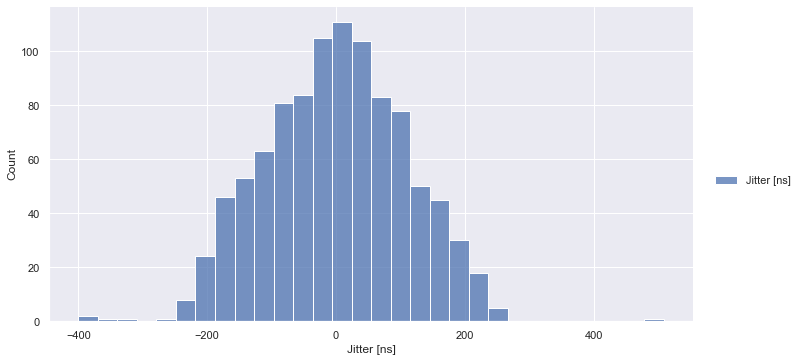

In [123]:
sns.set_theme() 
p = sns.displot(jitter_df, aspect=2, bins = 30)
p.set(xlabel="Jitter [ns]")